Part 1: Data preparation

In [76]:
import pandas as pd 
import statsmodels.formula.api as sm
import numpy as np

petshop = pd.read_excel("D:\\HAN - Third year\\Data modeling\\Final Report\\1668938Pet shop.xlsx")

#-------ASSIGNMENT 1
#Create dummies
petshop_catergory = pd.get_dummies(petshop['product_category'])
petshop_quality = pd.get_dummies(petshop['quality'])
petshop = pd.concat([petshop,
                     petshop_catergory,
                     petshop_quality],
                     axis = 1)
petshop.head()

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size,food,health,other,toys,off_brand,premium
0,1,115191,health,off_brand,4.3,3,20.0,46.2,1237,False,True,False,False,True,False
1,2,163488,toys,off_brand,4.9,6,18.0,61.6,1471,False,False,False,True,True,False
2,3,139606,health,off_brand,4.5,9,15.0,56.9,950,False,True,False,False,True,False
3,4,150165,toys,off_brand,4.0,9,11.0,35.5,1611,False,False,False,True,True,False
4,5,129727,health,premium,4.6,8,32.0,90.0,1240,False,True,False,False,False,True


In [77]:
#Regression model with all independent variables
model1 = sm.ols('products_sold~satisfaction+discount+retail_price+perc_physical+market_size+food+other+toys+premium', data = petshop).fit()
print(model1.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000026F0EFE1E50>>


In [78]:
#Check number of missing values
petshop.isnull().sum()
#Delete missing values
petshop1 = petshop.dropna()
#Just to make sure
petshop1.isnull().sum()

#Create model with missing data deleted
model2 = sm.ols('products_sold~satisfaction+discount+retail_price+perc_physical+market_size+food+other+toys+premium', data = petshop1).fit()

#Calculate the Cook's D values
CooksD = model2.get_influence().cooks_distance
#Calculate the sample size
n = len(petshop1)
#Add a variable to the data containing the Cooks D
petshop1['Outlier'] = CooksD[0] > 4/n 

#Inspect
petshop1a = petshop1[petshop1.Outlier == True]
print(petshop1a)
#Turn outliers in the original dataset into missing values
petshop.loc[petshop['discount']>53,'discount'] = np.nan
petshop.loc[petshop['perc_physical']>100,'perc_physical'] = np.nan

petshop.head()


      Unnamed: 0  products_sold product_category    quality  satisfaction  \
25            26         111248             toys    premium           2.7   
31            32          98069             toys  off_brand           2.0   
64            65         189776           health  off_brand           3.2   
68            69         190227             food    premium           4.6   
85            86         201258           health  off_brand           4.7   
...          ...            ...              ...        ...           ...   
2159        2160         312278             food    premium           4.6   
2172        2173         165994            other  off_brand           4.2   
2180        2181         101452           health  off_brand           2.9   
2197        2198          12008             toys  off_brand           3.4   
2222        2223          97564             food    premium           4.6   

      discount  retail_price  perc_physical  market_size   food  health  \


C:\Users\Le Ngoc Lam\AppData\Local\Temp\ipykernel_25720\301334401.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petshop1['Outlier'] = CooksD[0] > 4/n


,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size,food,health,other,toys,off_brand,premium
0,1,115191,health,off_brand,4.3,3.0,20.0,46.2,1237,False,True,False,False,True,False
1,2,163488,toys,off_brand,4.9,6.0,18.0,61.6,1471,False,False,False,True,True,False
2,3,139606,health,off_brand,4.5,9.0,15.0,56.9,950,False,True,False,False,True,False
3,4,150165,toys,off_brand,4.0,9.0,11.0,35.5,1611,False,False,False,True,True,False
4,5,129727,health,premium,4.6,8.0,32.0,90.0,1240,False,True,False,False,False,True


In [79]:
#-------ASSIGNMENT 2
#Inspect missing values: Categorical - quality; Continuous - discount, retail_price, perc_physical
petshop.isnull().sum()

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Create dummy variables for the missing data in the categorical variables (product_category and quality)
petshop_dummies = pd.get_dummies(petshop, dummy_na=True)

#Impute the data
imputed_petshop = IterativeImputer().fit_transform(petshop_dummies)
#Save the data as a pandas dataframe and import the column names from the original dataset
imputed_petshop = pd.DataFrame(imputed_petshop, columns=petshop_dummies.columns)

imputed_petshop.head()


,Unnamed: 0,products_sold,satisfaction,discount,retail_price,perc_physical,market_size,food,health,other,...,off_brand,premium,product_category_food,product_category_health,product_category_other,product_category_toys,product_category_nan,quality_off_brand,quality_premium,quality_nan
0,1.0,115191.0,4.3,3.0,20.0,46.2,1237.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,163488.0,4.9,6.0,18.0,61.6,1471.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3.0,139606.0,4.5,9.0,15.0,56.9,950.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,150165.0,4.0,9.0,11.0,35.5,1611.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,5.0,129727.0,4.6,8.0,32.0,90.0,1240.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
#Check correlation among variables for possible multicollinearity
correlations = imputed_petshop[['satisfaction','discount','retail_price','perc_physical','market_size','food','health','other','toys','off_brand','premium','product_category_nan','quality_nan']].corr()
print(correlations)

                      satisfaction  discount  retail_price  perc_physical  \
satisfaction              1.000000  0.027532      0.000521       0.022809   
discount                  0.027532  1.000000     -0.009376       0.008144   
retail_price              0.000521 -0.009376      1.000000       0.023657   
perc_physical             0.022809  0.008144      0.023657       1.000000   
market_size              -0.010993 -0.024158      0.014283       0.016259   
food                     -0.001213 -0.008990      0.021705       0.011287   
health                    0.027849  0.014439      0.008775      -0.217750   
other                    -0.027983  0.016204     -0.036272      -0.090371   
toys                     -0.007661 -0.019707      0.001847       0.273548   
off_brand                 0.021878  0.004228      0.043242       0.222401   
premium                  -0.020471 -0.008280     -0.046401      -0.205703   
product_category_nan           NaN       NaN           NaN            NaN   

<Axes: xlabel='satisfaction', ylabel='products_sold'>

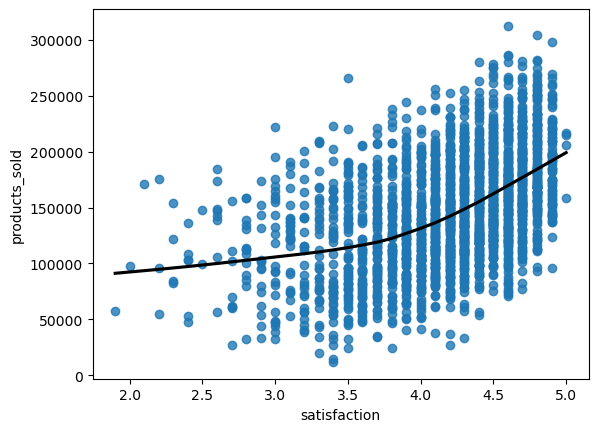

In [81]:
import seaborn as sns

#-------ASSIGNMENT 3

#Investigate the relationships
sns.regplot(x = imputed_petshop.satisfaction, y = imputed_petshop.products_sold, lowess = True, line_kws={'color':'black'}) #log

<Axes: xlabel='discount', ylabel='products_sold'>

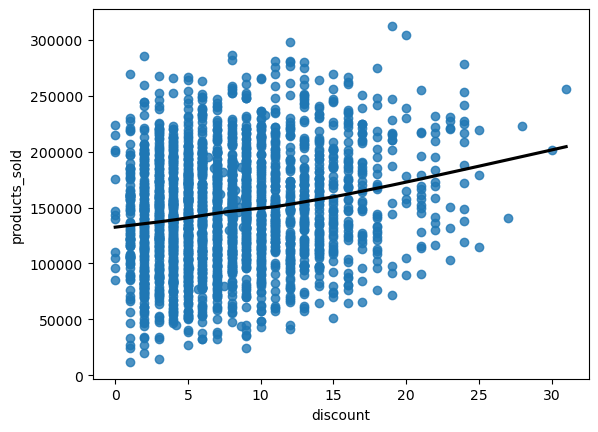

In [82]:
sns.regplot(x = imputed_petshop.discount, y = imputed_petshop.products_sold, lowess = True, line_kws={'color':'black'})

<Axes: xlabel='retail_price', ylabel='products_sold'>

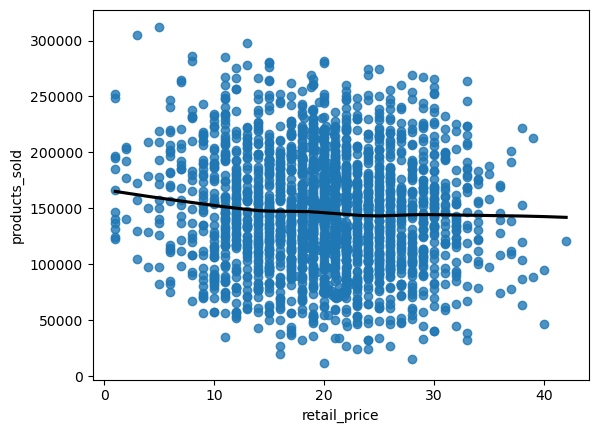

In [83]:
sns.regplot(x = imputed_petshop.retail_price, y = imputed_petshop.products_sold, lowess = True, line_kws={'color':'black'})

<Axes: xlabel='perc_physical', ylabel='products_sold'>

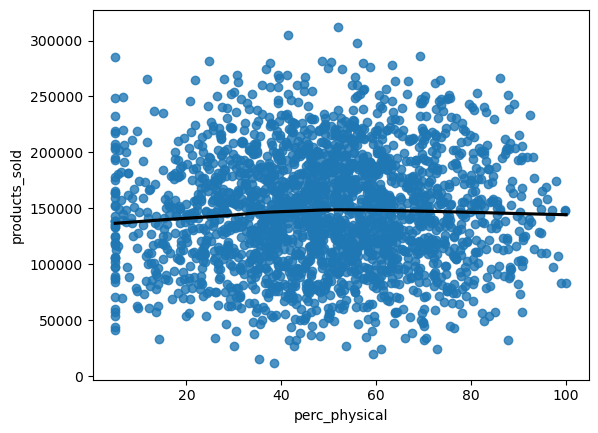

In [84]:
sns.regplot(x = imputed_petshop.perc_physical, y = imputed_petshop.products_sold, lowess = True, line_kws={'color':'black'}) #poly

<Axes: xlabel='market_size', ylabel='products_sold'>

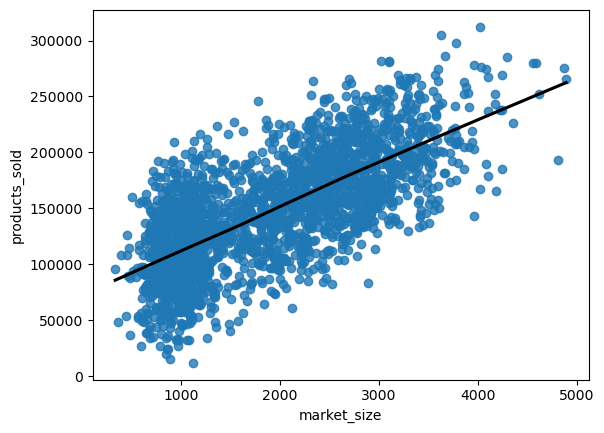

In [85]:
sns.regplot(x = imputed_petshop.market_size, y = imputed_petshop.products_sold, lowess = True, line_kws={'color':'black'})

In [86]:
import numpy as np

#Logarithmic transformation
satisfaction = imputed_petshop['satisfaction']
logsatisfaction = np.log(satisfaction)

#Regression model without transformation
model3 = sm.ols('products_sold~satisfaction',data=imputed_petshop).fit()
print(model3.summary())

#Regression model after transformation
model3a = sm.ols('products_sold~logsatisfaction',data=imputed_petshop).fit()
print(model3a.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     636.5
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          7.02e-124
Time:                        20:36:38   Log-Likelihood:                -27291.
No. Observations:                2250   AIC:                         5.459e+04
Df Residuals:                    2248   BIC:                         5.460e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.227e+04   7573.869     -5.581   

In [87]:
#Polynomial transformation
imputed_petshop['perc_physical2'] = pow(imputed_petshop.perc_physical,2)

#Regression model without transformation
model4 = sm.ols('products_sold~perc_physical',data=imputed_petshop).fit()
print(model4.summary())

#Regression model after transformation
model4a = sm.ols('products_sold~perc_physical+perc_physical2',data=imputed_petshop).fit()
print(model4a.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.704
Date:                Tue, 02 Apr 2024   Prob (F-statistic):              0.100
Time:                        20:36:38   Log-Likelihood:                -27570.
No. Observations:                2250   AIC:                         5.514e+04
Df Residuals:                    2248   BIC:                         5.516e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.431e+05   2798.753     51.120

Part 2: Data modeling

In [88]:
#-------ASSIGNMENT 4

#Regression model with all independent variables
model5 = sm.ols('products_sold~satisfaction+discount+retail_price+perc_physical+market_size+food+other+toys+premium+product_category_nan+quality_nan', data = imputed_petshop).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     1037.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:36:38   Log-Likelihood:                -25627.
No. Observations:                2250   AIC:                         5.128e+04
Df Residuals:                    2239   BIC:                         5.134e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.165e+05 

c:\Users\Public\anaconda\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [89]:
from sklearn.preprocessing import StandardScaler

#Standardization
imputed_petshop_s = imputed_petshop
imputed_petshop_s[['retail_price','market_size']] = StandardScaler().fit_transform(imputed_petshop_s[['retail_price','market_size']])
imputed_petshop_s.head()

#Model with standardized variables
model11 = sm.ols('products_sold~market_size+retail_price', data = imputed_petshop_s).fit()
print(model11.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     1173.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:36:38   Log-Likelihood:                -26768.
No. Observations:                2250   AIC:                         5.354e+04
Df Residuals:                    2247   BIC:                         5.356e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.473e+05    749.269    196.624   

In [90]:
#Make new prediction
New = pd.DataFrame([[4.6,20,10,55,1000,0,0,1,1,0,0]], columns = ['satisfaction', 'discount', 'retail_price','perc_physical','market_size','food','other','toys','premium','product_category_nan','quality_nan'])
print(model5.predict(New))

0    148318.783152
dtype: float64


In [91]:
#Check for parsimony
model5a = sm.ols('products_sold~satisfaction+discount+retail_price+perc_physical+market_size+toys+premium', data = imputed_petshop).fit()
print(model5a.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     1325.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:36:38   Log-Likelihood:                -25730.
No. Observations:                2250   AIC:                         5.148e+04
Df Residuals:                    2242   BIC:                         5.152e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.219e+04   4047.754    -12.894